In [1]:
# Install required libraries
!apt-get install graphviz -y
!pip install graphviz pygraphviz

import graphviz
from IPython.display import Image


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 7.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pygraphviz (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pygraphviz
Failed to build pygraphviz
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pygraphviz)


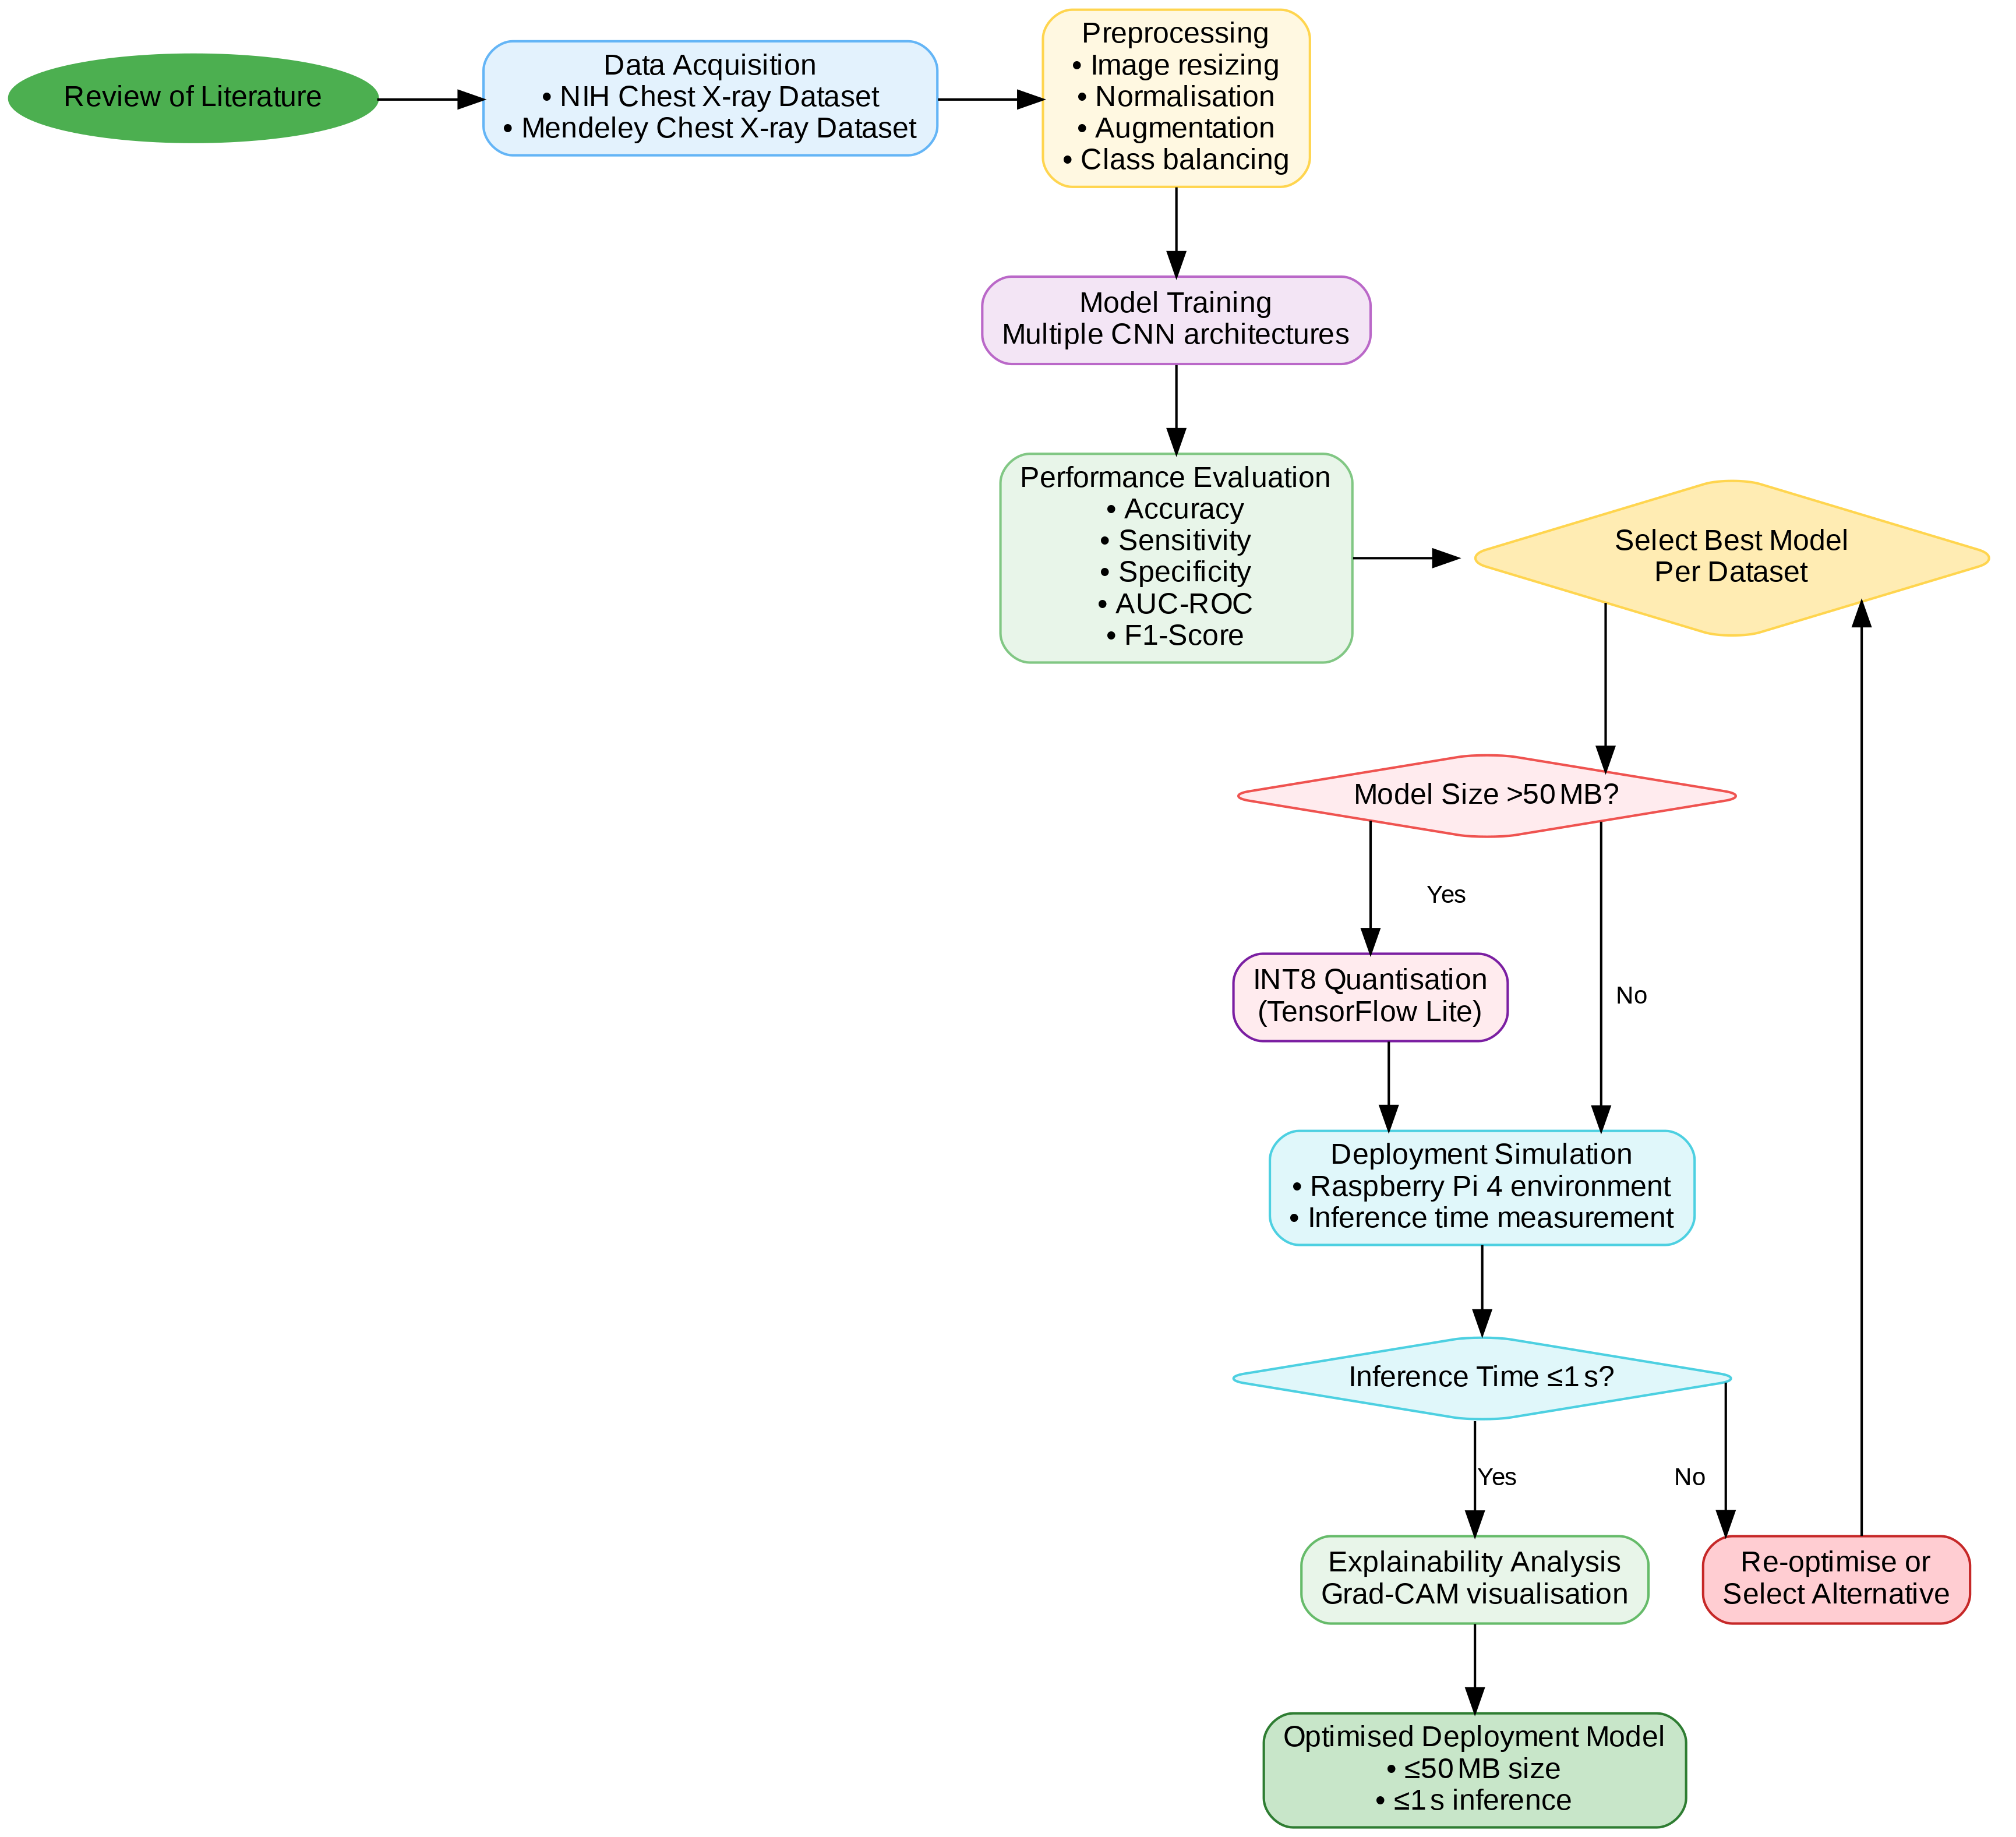

In [ ]:
from graphviz import Digraph
from IPython.display import Image, display

# Create mixed‐direction flowchart with high DPI
dot = Digraph(comment='Pneumonia Detection Workflow',
               graph_attr={
                   'splines': 'ortho',
                   'rankdir': 'TB',
                   'nodesep': '0.3',
                   'ranksep': '0.5',
                   'dpi': '300'  # high-resolution output
               },
               node_attr={
                   'shape': 'box',
                   'style': 'rounded,filled',
                   'fontname': 'Helvetica',
                   'fontsize': '12'
               },
               edge_attr={
                   'fontsize': '10',
                   'fontname': 'Helvetica'
               })

# Define colour scheme
colours = {
    'data':         '#E3F2FD',
    'processing':   '#FFF8E1',
    'model':        '#F3E5F5',
    'evaluation':   '#E8F5E9',
    'optimisation': '#FFEBEE',
    'deployment':   '#E0F7FA',
    'explainability':'#E8F5E9',
    'final':        '#C8E6C9'
}

# Add nodes
dot.node('start',      'Review of Literature', shape='ellipse', color='#4CAF50')
dot.node('data',       'Data Acquisition\n• NIH Chest X‑ray Dataset\n• Mendeley Chest X‑ray Dataset',
                          fillcolor=colours['data'], color='#64B5F6')
dot.node('preprocess', 'Preprocessing\n• Image resizing\n• Normalisation\n• Augmentation\n• Class balancing',
                          fillcolor=colours['processing'], color='#FFD54F')
dot.node('train',      'Model Training\nMultiple CNN architectures',
                          fillcolor=colours['model'], color='#BA68C8')
dot.node('eval',       'Performance Evaluation\n• Accuracy\n• Sensitivity\n• Specificity\n• AUC‑ROC\n• F1‑Score',
                          fillcolor=colours['evaluation'], color='#81C784')
dot.node('select',     'Select Best Model\nPer Dataset', shape='diamond',
                          fillcolor='#FFECB3', color='#FFD54F')
dot.node('size_check', 'Model Size >50 MB?', shape='diamond',
                          fillcolor=colours['optimisation'], color='#EF5350')
dot.node('quantise',   'INT8 Quantisation\n(TensorFlow Lite)',
                          fillcolor=colours['optimisation'], color='#7B1FA2')
dot.node('deploy',     'Deployment Simulation\n• Raspberry Pi 4 environment\n• Inference time measurement',
                          fillcolor=colours['deployment'], color='#4DD0E1')
dot.node('time_check', 'Inference Time ≤1 s?', shape='diamond',
                          fillcolor=colours['deployment'], color='#4DD0E1')
dot.node('gradcam',    'Explainability Analysis\nGrad‑CAM visualisation',
                          fillcolor=colours['explainability'], color='#66BB6A')
dot.node('final',      'Optimised Deployment Model\n• ≤50 MB size\n• ≤1 s inference',
                          fillcolor=colours['final'], color='#2E7D32')
dot.node('reject',     'Re‑optimise or\nSelect Alternative',
                          fillcolor='#FFCDD2', color='#C62828')

# Force the first three nodes into one horizontal rank
with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('start')
    s.node('data')
    s.node('preprocess')

# Add edges
dot.edge('start', 'data')
dot.edge('data', 'preprocess')
dot.edge('preprocess', 'train')
dot.edge('train', 'eval')

# Place eval and select on same rank for left-pointing arrow
with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('eval')
    s.node('select')

dot.edge('eval', 'select')
dot.edge('select', 'size_check')
dot.edge('size_check', 'quantise', label='Yes')
dot.edge('size_check', 'deploy',   label='No')
dot.edge('quantise',   'deploy')
dot.edge('deploy',     'time_check')
dot.edge('time_check', 'gradcam',  label='Yes')
dot.edge('time_check', 'reject',   label='No')
dot.edge('reject',     'select')
dot.edge('gradcam',    'final')

# Render and display inline
png_bytes = dot.pipe(format='png')
display(Image(data=png_bytes))

# Optional: save to file
with open('pneumonia_workflow_highdpi.png', 'wb') as f:
    f.write(png_bytes)


#### **Deployment Flowchart Design**

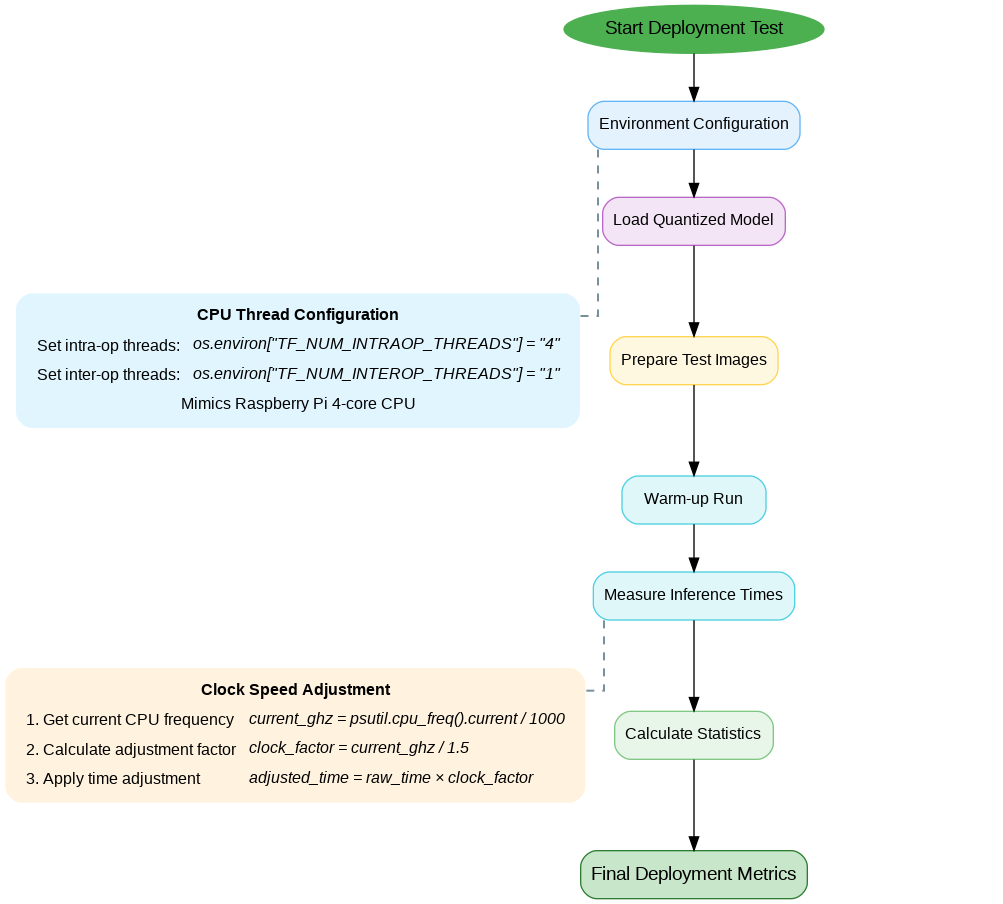

In [ ]:
# Create deployment metrics visualization with elegant annotations
dot = graphviz.Digraph(comment='Deployment Metrics Calculation',
                       graph_attr={'rankdir': 'TB', 'splines': 'ortho', 'nodesep': '0.3', 'ranksep': '0.5'},
                       node_attr={'shape': 'box', 'style': 'rounded,filled', 'fontname': 'Helvetica', 'fontsize': '12'},
                       edge_attr={'fontsize': '10', 'fontname': 'Helvetica'})

# Define refined color scheme
colors = {
    'config': '#E3F2FD',
    'model': '#F3E5F5',
    'data': '#FFF8E1',
    'measure': '#E0F7FA',
    'stats': '#E8F5E9',
    'result': '#C8E6C9',
    'annotation': '#FFF8E1'
}

# Main flow nodes - more compact design
dot.node('start', 'Start Deployment Test', shape='ellipse', color='#4CAF50', fontsize='14')
dot.node('config', 'Environment Configuration', fillcolor=colors['config'], color='#64B5F6', width='1.5')
dot.node('load', 'Load Quantized Model', fillcolor=colors['model'], color='#BA68C8', width='1.5')
dot.node('input', 'Prepare Test Images', fillcolor=colors['data'], color='#FFD54F', width='1.5')
dot.node('warmup', 'Warm-up Run', fillcolor=colors['measure'], color='#4DD0E1', width='1.5')
dot.node('measure', 'Measure Inference Times', fillcolor=colors['measure'], color='#4DD0E1', width='1.5')
dot.node('stats', 'Calculate Statistics', fillcolor=colors['stats'], color='#81C784', width='1.5')
dot.node('result', 'Final Deployment Metrics', fillcolor=colors['result'], color='#2E7D32', width='1.5', fontsize='14')

# Clock speed adjustment node - elegant and detailed
dot.node('clock_adj',
         ('<<table border="0" cellborder="0" cellspacing="5">'
          '<tr><td colspan="2" align="center"><b>Clock Speed Adjustment</b></td></tr>'
          '<tr><td align="left">1. Get current CPU frequency</td><td align="left"><i>current_ghz = psutil.cpu_freq().current / 1000</i></td></tr>'
          '<tr><td align="left">2. Calculate adjustment factor</td><td align="left"><i>clock_factor = current_ghz / 1.5</i></td></tr>'
          '<tr><td align="left">3. Apply time adjustment</td><td align="left"><i>adjusted_time = raw_time × clock_factor</i></td></tr>'
          '</table>>'),
         fillcolor='#FFF3E0', color='#EF6C00', shape='plaintext', style='filled,rounded')

# CPU configuration node
dot.node('cpu_config',
         ('<<table border="0" cellborder="0" cellspacing="5">'
          '<tr><td colspan="2" align="center"><b>CPU Thread Configuration</b></td></tr>'
          '<tr><td align="left">Set intra-op threads:</td><td align="left"><i>os.environ["TF_NUM_INTRAOP_THREADS"] = "4"</i></td></tr>'
          '<tr><td align="left">Set inter-op threads:</td><td align="left"><i>os.environ["TF_NUM_INTEROP_THREADS"] = "1"</i></td></tr>'
          '<tr><td colspan="2" align="center">Mimics Raspberry Pi 4-core CPU</td></tr>'
          '</table>>'),
         fillcolor='#E1F5FE', color='#0288D1', shape='plaintext', style='filled,rounded')

# Connections - main flow
dot.edge('start', 'config')
dot.edge('config', 'load')
dot.edge('load', 'input')
dot.edge('input', 'warmup')
dot.edge('warmup', 'measure')
dot.edge('measure', 'stats')
dot.edge('stats', 'result')

# Annotation connections with elegant styling
dot.edge('config', 'cpu_config', style='dashed', color='#78909C', arrowhead='none', penwidth='1.5')
dot.edge('measure', 'clock_adj', style='dashed', color='#78909C', arrowhead='none', penwidth='1.5')

# Add invisible alignment helpers
with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('dummy1', style='invis')
    s.node('dummy2', style='invis')
    s.edge('dummy1', 'dummy2', style='invis')

# Position annotations to the right with proper spacing
dot.edge('config', 'dummy1', style='invis')
dot.edge('measure', 'dummy2', style='invis')
dot.edge('cpu_config', 'clock_adj', style='invis')

# Save and render
dot.format = 'png'
dot.render('deployment_metrics_elegant', view=False, cleanup=True)

# Display in Colab
Image(filename='deployment_metrics_elegant.png')